In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
!pip install numpy==1.23.4 

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import supplementary visualization code visuals.py
import visuals as vs


# machine learning

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from dateutil import parser
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
import warnings  
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'E:\machine learning course\Lec 30 ML 14 George\P2\finding_donors\census.csv')
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


information of data set

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


know the duplication data

In [4]:
data.duplicated().sum()

5982

drop the dublication data (in this case equal 5982)

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39240 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              39240 non-null  int64  
 1   workclass        39240 non-null  object 
 2   education_level  39240 non-null  object 
 3   education-num    39240 non-null  float64
 4   marital-status   39240 non-null  object 
 5   occupation       39240 non-null  object 
 6   relationship     39240 non-null  object 
 7   race             39240 non-null  object 
 8   sex              39240 non-null  object 
 9   capital-gain     39240 non-null  float64
 10  capital-loss     39240 non-null  float64
 11  hours-per-week   39240 non-null  float64
 12  native-country   39240 non-null  object 
 13  income           39240 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.5+ MB


to know the min and max , average

In [7]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,39240.000000,39240.000000,39240.000000,39240.000000,39240.000000
mean,39.309225,10.136290,1253.314246,101.261340,41.206091
std,13.298041,2.637194,7993.997264,431.434412,12.458021
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
# n_greater_50k = data[data['income'] == '>50K'].shape[0]

# TODO: Number of records where individual's income is at most $50,000
# n_at_most_50k = data[data['income'] == '<=50K'].shape[0]

n_at_most_50k, n_greater_50k = data.income.value_counts()

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k / n_records ) *100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 39240
Individuals making more than $50,000: 9975
Individuals making at most $50,000: 29265
Percentage of individuals making more than $50,000: 25.420489296636084%


Transforming Skewed Continuous Features


A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number
of vastly larger or smaller values than that single number. Algorithms can be sensitive to such distributions of values and can 
underperform if the range is not properly normalized. With the census dataset two features fit this description: 'capital-gain' and 'capital-loss'

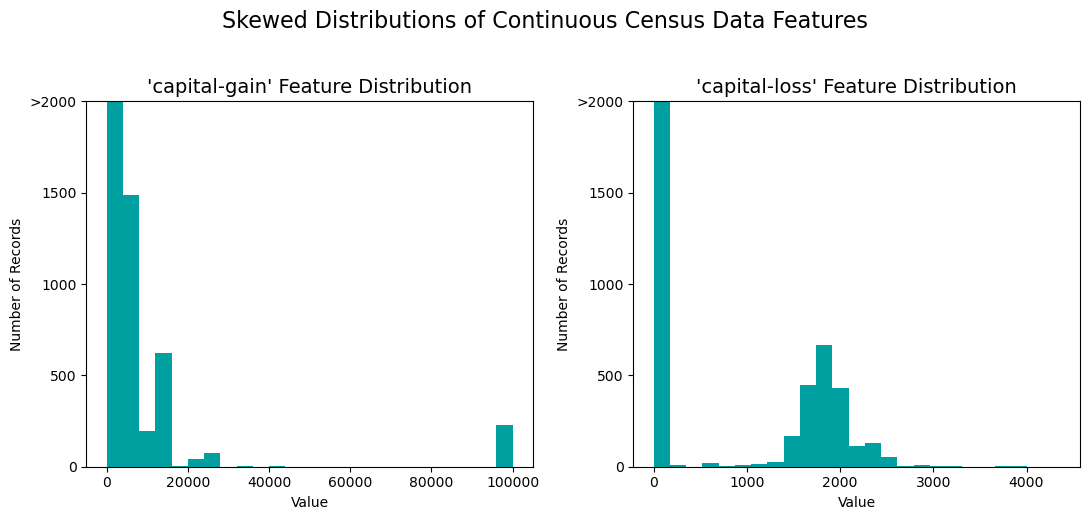

In [9]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as 'capital-gain' and 'capital-loss', it is common practice to apply
a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance
of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. 
Care must be taken when applying this transformation however: The logarithm of 0 is undefined,
so we must translate the values by a small amount above 0 to apply the the logarithm successfully.

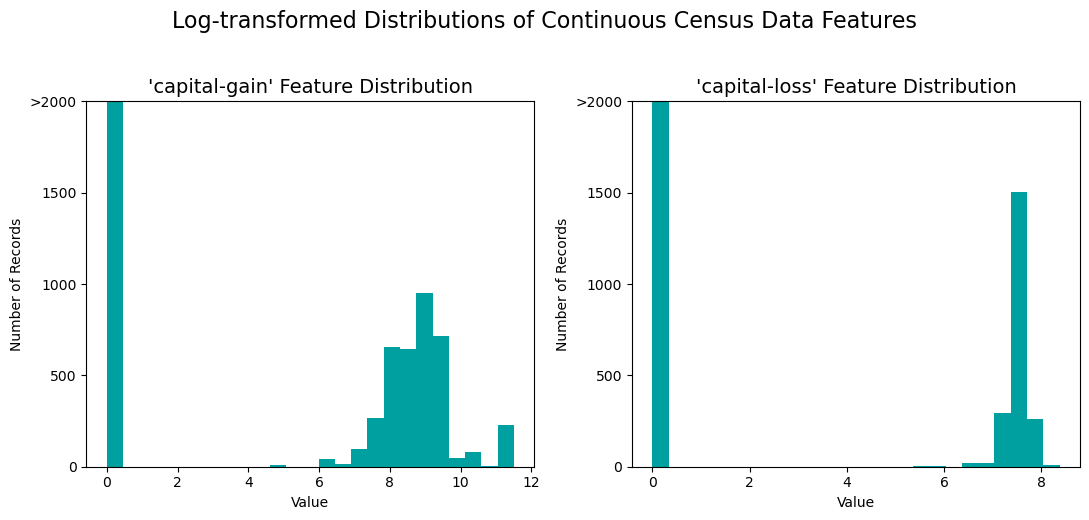

In [10]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

Normalization of continous data

In [11]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


One hot encoding 

In [12]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 0 if x == '<=50K' else 1)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

In [13]:
display(features_final)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.452055,0.800000,0.000000,0.0,0.122449,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.287671,0.533333,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.493151,0.400000,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.150685,0.800000,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,0.424658,0.866667,0.000000,0.0,0.397959,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45217,0.219178,0.800000,0.000000,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
45218,0.301370,0.800000,0.000000,0.0,0.357143,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
45220,0.369863,0.800000,0.747375,0.0,0.397959,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


Split Data

In [14]:
# Import train_test_split
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 31392 samples.
Testing set has 7848 samples.


Naive Predictor Performace : Refernce for me

In [15]:
TP = np.sum(income)
FP = income.count() - TP
TN = 0
FN = 0

# TODO: Calculate accuracy, precision and recall
accuracy = TP / income.count()
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2) * precision * recall / ((beta**2)*precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2542, F-score: 0.2988]


In [16]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

use the three supervised learning models 
GradientBoostingClassifier ,SGDClassifier , LogisticRegression


initlialize the models

LogisticRegression trained on 313 samples.
LogisticRegression trained on 3139 samples.
LogisticRegression trained on 31392 samples.
GradientBoostingClassifier trained on 313 samples.
GradientBoostingClassifier trained on 3139 samples.
GradientBoostingClassifier trained on 31392 samples.
SGDClassifier trained on 313 samples.
SGDClassifier trained on 3139 samples.
SGDClassifier trained on 31392 samples.


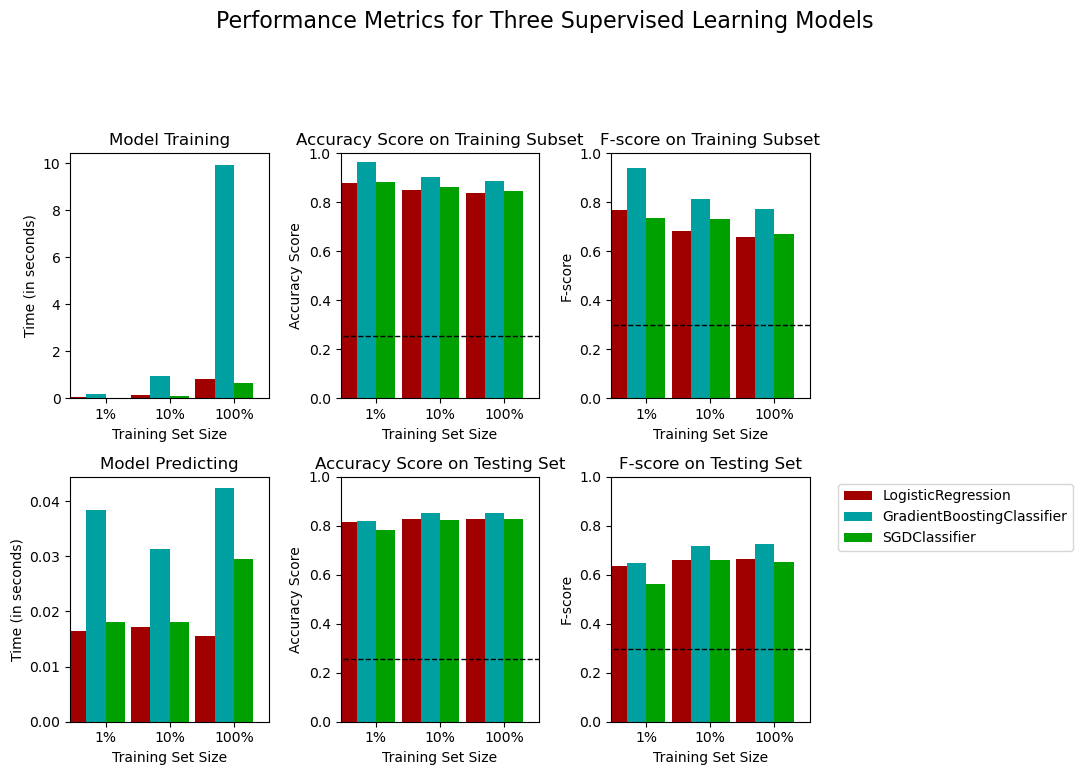

In [17]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier


# TODO: Initialize the three models
clf_A = LogisticRegression(random_state = 0)
clf_B = GradientBoostingClassifier(random_state = 0)
clf_C = SGDClassifier(random_state = 0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = X_train.shape[0]
samples_10 = samples_100 // 10
samples_1 = samples_100 // 100

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)


Fine tune the chosen model. Use grid search (GridSearchCV) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:

Import sklearn.grid_search.GridSearchCV and sklearn.metrics.make_scorer.
Initialize the classifier you've chosen and store it in clf.
Set a random_state if one is available to the same state you set before.
Create a dictionary of parameters you wish to tune for the chosen model.
Example: parameters = {'parameter' : [list of values]}.
Note: Avoid tuning the max_features parameter of your learner if that parameter is available!
Use make_scorer to create an fbeta_score scoring object (with 
).
Perform grid search on the classifier clf using the 'scorer', and store it in grid_obj.
Fit the grid search object to the training data (X_train, y_train), and store it in grid_fit.
Note: Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [18]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
#clf = AdaBoostClassifier(random_state = 0)
clf = GradientBoostingClassifier(random_state = 0)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
# parameters = {'n_estimators': [500,700], 'learning_rate': [1.25,1.5,1.75]}
parameters = {'learning_rate': [0.05, 0.07, 0.1]}
              ,#'n_estimators': [100, 200, 300]
              ,#'max_depth' : [3, 5, 7]

             

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nUnoptimized Classifier\n------")
print(clf)
print("\nOptimized Classifier\n------")
print(best_clf)

Unoptimized model
------
Accuracy score on testing data: 0.8541
F-score on testing data: 0.7276

Optimized Model
------
Final accuracy score on the testing data: 0.8541
Final F-score on the testing data: 0.7276

Unoptimized Classifier
------
GradientBoostingClassifier(random_state=0)

Optimized Classifier
------
GradientBoostingClassifier(random_state=0)


Perceptron deep learning

In [52]:
from sklearn.model_selection import train_test_split 


In [71]:
def sigmoid(X):
    print(X)
    X=X.astype(float)
    return 1/(1+np.exp(-X))

In [29]:
def update_weights(weights,X,z,y,lr):
    m=len(y)
    
    dw=(1/m)*(np.dot((X.T,(z-y))).astype(float))
    
    weights=weights-lr*dw
    
    return weights

In [75]:
def update_bais(bais,X,z,y,lr):
    m=len(y)
    
    db=(1/m)*np.sum(z-y)
    bais=bais-lr*db
    return bais

In [76]:
def perceptron(X,weights,bais):
    linear_prediction=(np.dot(X,weights))+bais
    
    y_pred=sigmoid(linear_prediction)
    
    y_p=[1 if y>=0.5 else 0  for y in y_pred ]
     
    """ 
    y_p=[]
    for y in y_pred:
        if y>=0.5:
            y_p.append(1)
            
        else:
            y_p.append(0)
            
    """

    return y_p

In [24]:
X_train.shape

(31392, 103)

In [25]:
def accuarcy(y_pred,y_actual):
    return np.sum(y_pred==y_actual)/len(y_actual)

In [83]:
lr=0.001
weights=(np.zeros(X_train.shape[1]))
bais=0


for i in range(1000):
    
    pred=perceptron(X_train,weights,bais)
    
    #print("Accuracy : ",accuarcy(pred,train_y))
    
    
    weights=update_weights(weights,X_train,pred,y_train,lr)
    bais=update_bais(bais,X_train,pred,y_train,lr)  

[0.0 0.0 0.0 ... 0.0 0.0 0.0]
[-0.0041636698215515916 -0.0030713344106085205 -0.003455597820728829 ...
 -0.004015199257422754 -0.0026427468683426175 -0.003951992316521815]
[-0.002348553004615409 -0.0017122652304436053 -0.0020708758424029783 ...
 -0.0027122218619315833 -0.0017984757367609516 -0.0024924157046204583]
[-0.0005334361876792263 -0.00035319605027869056 -0.0006861538640771279 ...
 -0.0014092444664404128 -0.0009542046051792863 -0.0010328390927191017]
[0.0012666627770484525 0.000991906192017504 0.000688020247928928 ...
 -0.00011239676510732153 -0.00011702164736936984 0.0004170528625453889]
[-0.001141154192334438 -0.0008634464240546977 -0.001104319858156881 ...
 -0.0019192301303355055 -0.0013991210140160268 -0.0015968901782297974]
[0.0006739626246017448 0.0004956227561102172 0.0002804021201689696 ...
 -0.0006162527348443349 -0.0005548498824343612 -0.0001373135663284409]
[-0.0007032435491458408 -0.0006506429962543905 -0.0006344975042417372 ...
 -0.001339686850165431 -0.001160591593

In [84]:
y_pred=perceptron(X_test,weights,bais)
print("Accuarcy : " ,accuarcy(y_pred,y_test))

[0.00045015235114685985 0.0010808710145137086 -0.0010647769492144908 ...
 -0.0016874699052589152 -0.0011145722796109831 4.250828554039311e-07]
Accuarcy :  0.7415902140672783
